In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
sns.set_theme(style="white")

In [2]:
df=pd.read_csv("/content/world_population.csv")

In [3]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
print("\n","The dataframe has",df.shape[0],"rows and", df.shape[1], "columns.","\n")
print("\n","Number of countries in the dataset:\n",df.Country.nunique(),"\n")
print("\n","Number of countries per continent:\n",df.Continent.value_counts(),"\n")
print("\n","Column names\n",df.columns.values,"\n")


 The dataframe has 234 rows and 17 columns. 


 Number of countries in the dataset:
 234 


 Number of countries per continent:
 Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64 


 Column names
 ['Rank' 'CCA3' 'Country' 'Capital' 'Continent' '2022 Population'
 '2020 Population' '2015 Population' '2010 Population' '2000 Population'
 '1990 Population' '1980 Population' '1970 Population' 'Area (km²)'
 'Density (per km²)' 'Growth Rate' 'World Population Percentage'] 



# Correlation

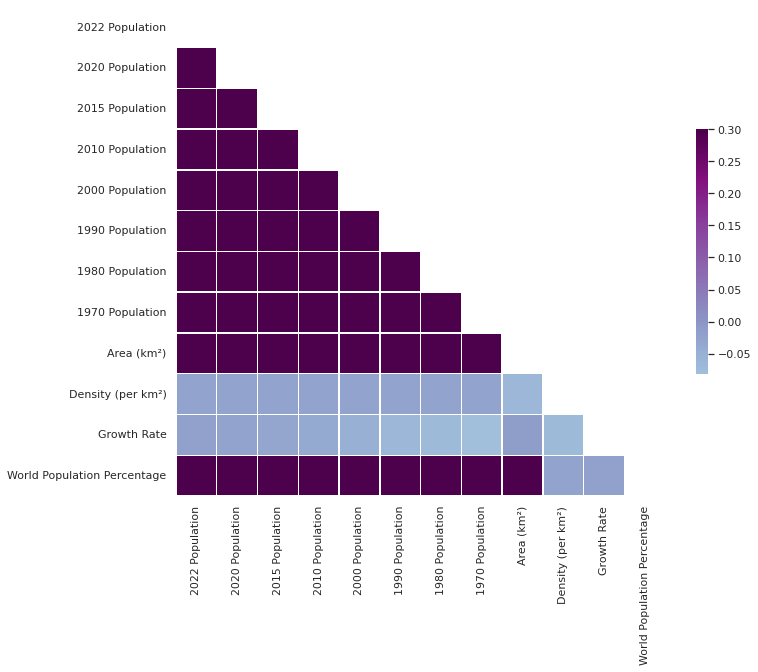

In [45]:
corr = df.iloc[:,1:].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(235, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='BuPu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Percentages of world population

In [8]:
continents = df.groupby(['Continent'],as_index=False)['World Population Percentage'].agg([max,sum])
continents

,max,sum
Continent,,
Africa,2.74,17.87
Asia,17.88,59.19
Europe,1.81,9.33
North America,4.24,7.51
Oceania,0.33,0.55
South America,2.70,5.48


Text(0.5, 1.0, 'World population by Continent')

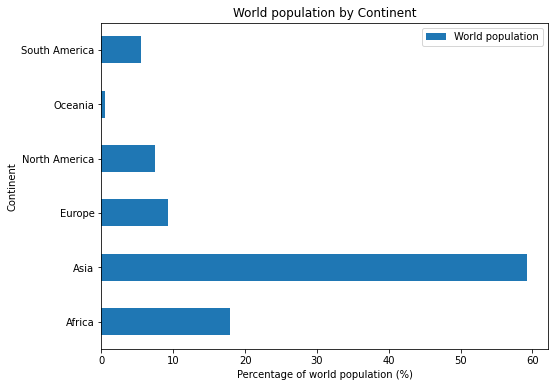

In [9]:
continents.plot(kind="barh", y='sum',figsize=(8,6),label='World population')
plt.xlabel("Percentage of world population (%)")
plt.title("World population by Continent")

# Number of countries

In [11]:
print(df['Continent'].value_counts(),"\n")
print(df.groupby('Continent')['Country'].count(),"\n")

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64 

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Country, dtype: int64 



([<matplotlib.patches.Wedge at 0x7f569e0e8350>,
 [Text(0.7933226911635385, 0.7619967898128187, 'Africa'),
  Text(-0.6489509921990213, 0.8881793792494318, 'Europe'),
  Text(-1.0119773781913737, -0.43116329392576286, 'Asia'),
  Text(0.04429258293469795, -1.099107896021575, 'North America'),
  Text(0.8520655026864785, -0.6956898584366735, 'Oceania'),
  Text(1.0806265254874028, -0.20553907758142614, 'South America')],
 [Text(0.4327214679073846, 0.4156346126251738, '24.4%'),
  Text(-0.3539732684721934, 0.4844614795905991, '21.4%'),
  Text(-0.5519876608316583, -0.23517997850496153, '21.4%'),
  Text(0.024159590691653424, -0.59951339782995, '17.1%'),
  Text(0.4647630014653519, -0.3794671955109128, '9.8%'),
  Text(0.589432650265856, -0.11211222413532333, '6.0%')])

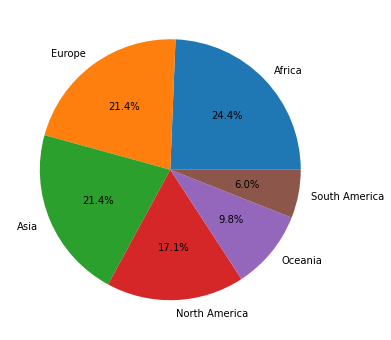

In [12]:
plt.subplots(figsize=(6,6))
plt.pie(df['Continent'].value_counts(),labels=['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],autopct="%1.1f%%")

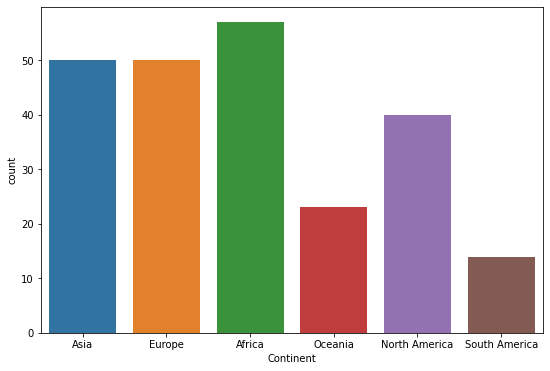

In [13]:
plt.subplots(figsize=(9,6))
plt.ylabel("Number of countries per continent")
sns.countplot(x='Continent',data=df)

# Area of each continent (km2)

In [15]:
df.groupby('Continent')['Area (km²)'].sum()

Continent
Africa           30317963
Asia             32138141
Europe           23010411
North America    24244178
Oceania           8515081
South America    17833382
Name: Area (km²), dtype: int64

In [17]:
continents_area = df.groupby(['Continent'],as_index=False)['Area (km²)'].sum().sort_values(by='Area (km²)', ascending=False)

Text(0.5, 1.0, 'Area (km2) per continent')

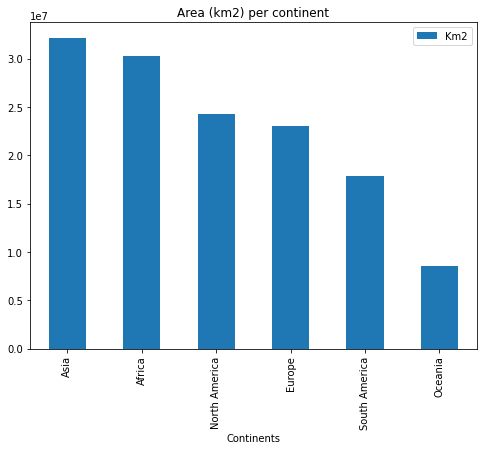

In [18]:
continents_area.plot(kind="bar", x= 'Continent', y='Area (km²)',figsize=(8,6),label='Km2')
plt.xlabel("Continents")
plt.title("Area (km2) per continent")

# Analysis of countries

In [20]:
top10_countries = df.nlargest(10,['2022 Population','World Population Percentage'])
top10_countries

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


Text(0.5, 0, 'World population (%)')

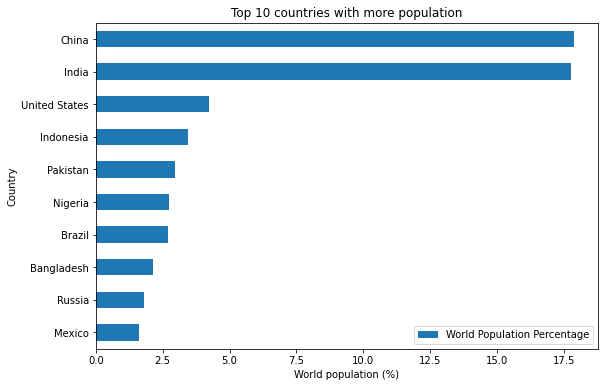

In [23]:
top10_countries.sort_values('World Population Percentage', inplace=True)
top10_countries.plot(kind='barh',x="Country",y="World Population Percentage",figsize=(9,6))
plt.title("Top 10 countries with more population")
plt.xlabel("World population (%)")

# Top 10 smallest countries

In [25]:
top10_smallest= df.nsmallest(10,['Area (km²)']).sort_values(by='Area (km²)',ascending=False)
top10_smallest= top10_smallest.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)']]
top10_smallest

,Country,2022 Population,Area (km²),Density (per km²)
176,Saint Martin,31791,53,599.8302
188,Sint Maarten,44175,34,1299.2647
119,Macau,695168,30,23172.2667
216,Tuvalu,11312,26,435.0769
142,Nauru,12668,21,603.2381
173,Saint Barthelemy,10967,21,522.2381
209,Tokelau,1871,12,155.9167
76,Gibraltar,32649,6,5441.5000
134,Monaco,36469,2,18234.5000
226,Vatican City,510,1,510.0000


Text(0.5, 1.0, 'Smallest countries in the world')

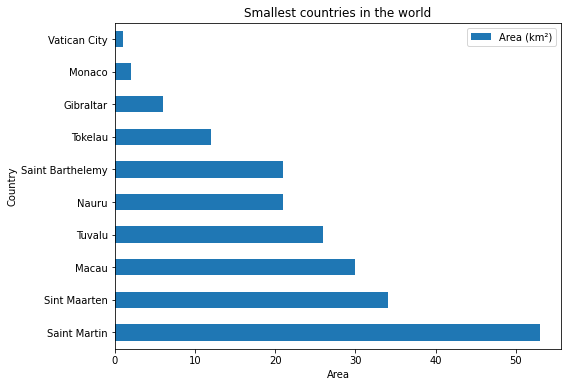

In [26]:
top10_smallest.plot(kind='barh',x='Country',y='Area (km²)',figsize=(8,6))
plt.xlabel("Area")
plt.title("Smallest countries in the world")

# Population growth from 1970 to 2020

In [27]:
data_growth_50year=df.loc[:,['Country','Continent','2020 Population','1970 Population']]
data_growth_50year.columns.values

array(['Country', 'Continent', '2020 Population', '1970 Population'],
      dtype=object)

In [28]:
data_growth_50year['50 Year Growth [%]'] = data_growth_50year['2020 Population'] / data_growth_50year['1970 Population']
data_growth_50year.loc[:,['Country','2020 Population','1970 Population','50 Year Growth [%]']].sort_values(by='50 Year Growth [%]',ascending=False)

,Country,2020 Population,1970 Population,50 Year Growth [%]
219,United Arab Emirates,9287289,298084,31.156617
167,Qatar,2760385,118007,23.391706
130,Mayotte,305587,35383,8.636549
215,Turks and Caicos Islands,44276,5665,7.815711
52,Djibouti,1090156,144379,7.550655
...,...,...,...,...
111,Latvia,1897052,2397414,0.791291
73,Georgia,3765912,4800426,0.784495
226,Vatican City,520,752,0.691489
137,Montserrat,4500,11402,0.394668


In [29]:
top10growth = data_growth_50year.sort_values(by='50 Year Growth [%]',ascending=False).head(10)
last10growth = data_growth_50year.sort_values(by='50 Year Growth [%]',ascending=False).tail(10)

In [30]:
data_growth = top10growth.append(last10growth, ignore_index=True)
data_growth

,Country,Continent,2020 Population,1970 Population,50 Year Growth [%]
0,United Arab Emirates,Asia,9287289,298084,31.156617
1,Qatar,Asia,2760385,118007,23.391706
2,Mayotte,Africa,305587,35383,8.636549
3,Turks and Caicos Islands,North America,44276,5665,7.815711
4,Djibouti,Africa,1090156,144379,7.550655
5,Western Sahara,Africa,556048,76371,7.280879
6,Jordan,Asia,10928721,1557374,7.017403
7,Sint Maarten,North America,43621,6260,6.968211
8,Oman,Asia,4543399,670693,6.774186
9,Bahrain,Asia,1477469,222555,6.638669


# Countries that represent a % of world population

**Countries that represent less than 0.1% of the world population**

In [32]:
df[df['World Population Percentage'] < 0.1]['Country'].size

132

# **Countries that represent more than 2% of the world population**

In [33]:
df[df['World Population Percentage'] > 2].sort_values(by='Rank')

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


**Overpopulated countries**

In [34]:
df.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)',]].sort_values(by='Density (per km²)',ascending=False).head(10)

,Country,2022 Population,Area (km²),Density (per km²)
119,Macau,695168,30,23172.2667
134,Monaco,36469,2,18234.5000
187,Singapore,5975689,710,8416.4634
89,Hong Kong,7488865,1104,6783.3922
76,Gibraltar,32649,6,5441.5000
15,Bahrain,1472233,765,1924.4876
123,Maldives,523787,300,1745.9567
125,Malta,533286,316,1687.6139
188,Sint Maarten,44175,34,1299.2647
22,Bermuda,64184,54,1188.5926


# Function for population

In [39]:
def selectedFive(col):
    temp = df[['Country', col]]
    temp.reset_index(inplace=True,drop=True)
    temp.sort_values(col, ascending=False, inplace=True, kind='stable')
    
    # Plot
    fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=False,
                    horizontal_spacing=0.04)
    
    # Top 5
    fig.add_trace(go.Bar(x=temp['Country'].head(), 
                     y=temp[col].head(),
                     name='Top 5 (highest)', marker_color='#37392E',
                     ), row=1, col=1)
    
    # Bottom 5
    fig.add_trace(go.Bar(x=temp['Country'].tail(), 
                     y=temp[col].tail(),
                     name='Bottom 5 (lowest)', marker_color='#DDCECD',
                     ), row=1, col=2)
    
    fig.update_xaxes(nticks=25)
    fig.update_yaxes(nticks=5)
    fig.update_layout(title='Countries with highest & lowest '+col,                   
                  title_x=0.5,
                  titlefont_size=16)
    return fig.show()
    

In [40]:
selectedFive('2020 Population')

In [43]:
selectedFive('Area (km²)')